# Preprocessing

Importing relevant libraries and reading train data and test data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from copy import deepcopy
import pickle
import scipy

In [2]:
# Read from a csv file
temp_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

In [5]:
class OutlierRemoval: 
    def __init__(self, lower_quartile, upper_quartile):
        self.lower_whisker = lower_quartile - 1.5*(upper_quartile - lower_quartile)
        self.upper_whisker = upper_quartile + 1.5*(upper_quartile - lower_quartile)
    def removeOutlier(self, x):
        return (x if x <= self.upper_whisker and x >= self.lower_whisker else (self.lower_whisker if x < self.lower_whisker else (self.upper_whisker)))

In [8]:
test_df = test_df.drop_duplicates()
test_df.tail()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION
222376,491588,Vs pink bling hoodie,3,Women/Sweaters/Hooded,PINK,0,Worn once and washed Hung dry Missing hoodie s...
222377,1410603,Gap wool blend Moto jacket,2,Women/Coats & Jackets/Wool,Gap,1,Another super cute jacket. Wool blend exterior...
222378,207926,Vs thong NWT,1,Women/Underwear/G-Strings & Thongs,Victoria's Secret,0,Victoria's Secret gold and black lace thong si...
222379,241496,Clearance! Pink charms bundle 30pc,1,Handmade/Accessories/Charm,NaN,0,Note: they are not Pandora but fit Pandora bra...
222380,563849,Nyx Lingerie Lipstick,1,Beauty/Makeup/Lips,NYX,1,7$ each with free shipping The more you buy th...


## Gathering Unique Brand Names from train and test data

Percentage of null values in each column

In [ ]:
temp_df.isna().sum()/len(temp_df)*100

In [10]:
brand_names_list = set(temp_df['PRODUCT_BRAND'].unique().tolist())
brand_names_list.union(set(test_df['PRODUCT_BRAND'].unique().tolist()))
brand_names_list = list(brand_names_list)[1:]

4633
4633


In [11]:
long_brand_names_list = [i for i in brand_names_list if len(i.split())>1]
short_brand_names_list = [i for i in set(set(brand_names_list) - set(long_brand_names_list))]

In [12]:
null_train_idxs = [i for i,j in enumerate(temp_df['PRODUCT_BRAND'].isnull()) if j==True]
null_test_idxs = [i for i,j in enumerate(test_df['PRODUCT_BRAND'].isnull()) if j==True]

In [14]:
for i in null_train_idxs:
    flag = 0
    for name in long_brand_names_list:
        if(name in str(temp_df["PRODUCT_DESCRIPTION"][i])):
            temp_df.at[i, "PRODUCT_BRAND"] = str(name)
            flag = 1
            break
        if(name in str(temp_df["PRODUCT_NAME"][i])):
            flag = 1
            temp_df.at[i, "PRODUCT_BRAND"] = str(name)
            break        

    # If brand_name couldn't be found in long names list  
    if flag == 1:
        continue
            
    for name in short_brand_names_list:
        if name in str(temp_df["PRODUCT_DESCRIPTION"][i]).split():
            temp_df.at[i, "PRODUCT_BRAND"] = str(name)
            break
        if name in str(temp_df["PRODUCT_NAME"][i]).split():
            temp_df.at[i, "PRODUCT_BRAND"] = str(name)
            break

In [15]:
for i in null_test_idxs:
    flag = 0
    for name in long_brand_names_list:
        if(name in str(test_df["PRODUCT_DESCRIPTION"][i])):
            test_df.at[i, "PRODUCT_BRAND"] = str(name)
            flag = 1
            break
        if(name in str(test_df["PRODUCT_NAME"][i])):
            flag = 1
            test_df.at[i, "PRODUCT_BRAND"] = str(name)
            break        

    # If brand_name couldn't be found in long names list  
    if flag == 1:
        continue
            
    for name in short_brand_names_list:
        if name in str(test_df["PRODUCT_DESCRIPTION"][i]).split():
            test_df.at[i, "PRODUCT_BRAND"] = str(name)
            break
        if name in str(test_df["PRODUCT_NAME"][i]).split():
            test_df.at[i, "PRODUCT_BRAND"] = str(name)
            break

## Storing brand imputed data

In [83]:
temp_df.to_csv('../midtrain.csv',index=False)
test_df.to_csv('../midtest.csv',index=False)

## Reading updated training and test datasets

In [43]:
temp_df = pd.read_csv('../midtrain.csv')
test_df = pd.read_csv('../midtest.csv')
original_y = deepcopy(temp_df['PRODUCT_PRICE'].to_numpy().astype(np.float64))

In [87]:
temp_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
0,952289,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,Lipstick Queen,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0
1,121903,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0
2,280534,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0
3,787961,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0
4,479292,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,Bike,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0


In [85]:
temp_df.columns

Index(['PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_CONDITION', 'CATEGORY',
       'PRODUCT_BRAND', 'SHIPPING_AVAILABILITY', 'PRODUCT_DESCRIPTION',
       'PRODUCT_PRICE'],
      dtype='object')

In [86]:
test_df.columns

Index(['PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_CONDITION', 'CATEGORY',
       'PRODUCT_BRAND', 'SHIPPING_AVAILABILITY', 'PRODUCT_DESCRIPTION'],
      dtype='object')

## CATEGORY column

Break category column into 5 columns (as there are maximum 4 slashes in the string). This has been verified by running the above code snippet.

In [88]:
temp_df[['C1','C2','C3','C4','C5']] = temp_df["CATEGORY"].str.split("/",expand=True).loc[:,:4]
test_df[['C1','C2','C3','C4','C5']] = test_df["CATEGORY"].str.split("/",expand=True).loc[:,:4]
temp_df.drop(columns = ['CATEGORY'],inplace=True)
test_df.drop(columns = ['CATEGORY'],inplace=True)

The following code is used to check the percentage of null values in each column.

In [3]:
temp_df.isna().sum()/len(temp_df)*100

PRODUCT_ID                0.000000
PRODUCT_NAME              0.000000
PRODUCT_CONDITION         0.000000
CATEGORY                  0.429789
PRODUCT_BRAND            27.070422
SHIPPING_AVAILABILITY     0.000000
PRODUCT_DESCRIPTION       0.000238
PRODUCT_PRICE             0.000000
dtype: float64

The percentage of null values in columns C4 and C5 is extremely high. So, we can drop those columns.

In [90]:
temp_df.drop(columns = ['C4', 'C5'], inplace = True)
test_df.drop(columns = ['C4', 'C5'], inplace = True)

## Filling Null Values

In [91]:
temp_df[['C1','C2','C3',]] = temp_df[['C1','C2','C3',]].fillna('Empty')
test_df[['C1','C2','C3',]] = test_df[['C1','C2','C3',]].fillna('Empty')

temp_df['PRODUCT_BRAND'].fillna(value = 'missing' , inplace = True)
test_df['PRODUCT_BRAND'].fillna(value = 'missing' , inplace = True)

temp_df['PRODUCT_DESCRIPTION'].fillna(value = 'missing' , inplace = True)
test_df['PRODUCT_DESCRIPTION'].fillna(value = 'missing' , inplace = True)

In [92]:
temp_df.nunique()

PRODUCT_ID               1260154
PRODUCT_NAME             1052486
PRODUCT_CONDITION              5
PRODUCT_BRAND               4633
SHIPPING_AVAILABILITY          2
PRODUCT_DESCRIPTION      1093532
PRODUCT_PRICE                799
C1                            11
C2                           114
C3                           864
dtype: int64

[]

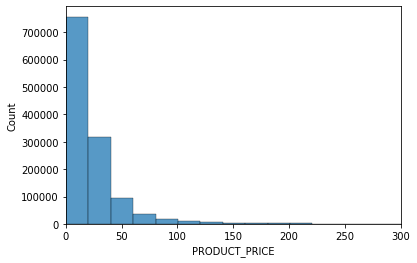

In [44]:
sns.histplot(data=temp_df, x="PRODUCT_PRICE", bins = 100, multiple="stack")
plt.xlim(0, 300)
plt.plot()

From the above plot, we can see the number of products belonging to different main categories (C1 values) for different price ranges. We will do more exploratory data analysis later.

## NLP

In [98]:
import re
from nltk.corpus import stopwords
# import nltk.corpus
stop_words = stopwords.words('english')

def preprocess_cat(values):
    '''Preprocess categorical variables'''
    preprocessed_values = []
    for val in values:
        val = str(val)
        val = val.replace("&","_")
        val = re.sub('[^A-Za-z0-9é]+',' ',val)
        val = '_'.join(e for e in val.split())
        preprocessed_values.append(val)
    return preprocessed_values

def decontracted(text):
    '''Decontracts the input text'''
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

from tqdm import tqdm

def preprocess_description(corpus):
    '''Preprocess the product descriptions'''
    preprocessed_corpus = []
    for text in tqdm(corpus):
        text = re.sub(r'No description yet' ,'',str(text))
        text = str(text).lower()
        text = decontracted(text)
        text = text.replace('\\n', ' ')
        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        text = text.replace('rm', ' ')
        #text = ' '.join(e for e in text.split() if ((e not in stopwords)&(len(e)>2)))
        text = ' '.join(e for e in text.split() if e not in stop_words)
        preprocessed_corpus.append(text.strip())
    return preprocessed_corpus

def preprocess_name(corpus):
    '''Preprocess the product names'''
    preprocessed_names = []
    for text in tqdm(corpus):
        text = text.lower()
        text = text.replace('\\n', ' ')
        text = re.sub('[^A-Za-z0-9]+', ' ', text)
        #text = ' '.join(e for e in text.split() if ((e not in stopwords)&(len(e)>2)))
        text = ' '.join(e for e in text.split() )
        preprocessed_names.append(text.strip())
    return preprocessed_names

In [99]:
temp_df['C1'] = preprocess_cat(temp_df['C1'])
temp_df['C2'] = preprocess_cat(temp_df['C2'])
temp_df['C3'] = preprocess_cat(temp_df['C3'])

test_df['C1'] = preprocess_cat(test_df['C1'])
test_df['C2'] = preprocess_cat(test_df['C2'])
test_df['C3'] = preprocess_cat(test_df['C3'])

In [100]:
temp_df['PRODUCT_DESCRIPTION'] = preprocess_description(temp_df['PRODUCT_DESCRIPTION'])
test_df['PRODUCT_DESCRIPTION'] = preprocess_description(test_df['PRODUCT_DESCRIPTION'])

100%|██████████| 222381/222381 [00:12<00:00, 17583.03it/s]


In [101]:
temp_df['PRODUCT_NAME'] = preprocess_name(temp_df['PRODUCT_NAME'])
test_df['PRODUCT_NAME'] = preprocess_name(test_df['PRODUCT_NAME'])

100%|██████████| 222381/222381 [00:00<00:00, 275853.09it/s]


In [102]:
temp_df.to_csv('../pdtrain.csv',index=False)
test_df.to_csv('../pdtest.csv',index=False)

In [2]:
temp_df = pd.read_csv('../pdtrain.csv')
test_df = pd.read_csv('../pdtest.csv')

In [3]:
temp_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,C1,C2,C3
0,952289,lipstick queen reserved maiwu,4,Lipstick Queen,0,lipstick queen jean queen medieval lipstick us...,20.0,Beauty,Makeup,Lips
1,121903,garbage pail kids blu ray,3,missing,1,26plays great tested watched scratches,15.0,Electronics,Media,Blu_Ray
2,280534,green floam slime,1,missing,0,6 oz dragon fruit scented keep reach young chi...,8.0,Kids,Toys,Arts_Crafts
3,787961,wallet beige monogram,1,missing,0,wallet brand new never used,31.0,Women,Women_s_Accessories,Wallets
4,479292,triangle bike or body blue light,3,Bike,0,triangle bike body blue light steady flashing ...,8.0,Sports_Outdoors,Outdoors,Other


### Lemmatization of Product Description column

In [12]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm

lemma = WordNetLemmatizer()
def lemmatize(corpus):
    processed_lemma = []
    for sentence in tqdm(corpus):
        words = word_tokenize(sentence)
        words = [lemma.lemmatize(word) for word in words]
        words = ' '.join(words)
        processed_lemma.append(words.strip())
    return processed_lemma

In [14]:
temp_df['PRODUCT_DESCRIPTION'] = temp_df['PRODUCT_DESCRIPTION'].astype(str)
test_df['PRODUCT_DESCRIPTION'] = test_df['PRODUCT_DESCRIPTION'].astype(str)

In [15]:
temp_df['PRODUCT_DESCRIPTION'] = lemmatize(temp_df['PRODUCT_DESCRIPTION'])
test_df['PRODUCT_DESCRIPTION'] = lemmatize(test_df['PRODUCT_DESCRIPTION'])

100%|██████████| 222381/222381 [00:37<00:00, 5996.81it/s]


In [17]:
temp_df.to_csv('../lemmatrain.csv',index=False)
test_df.to_csv('../lemmatest.csv',index=False)

In [2]:
temp_df = pd.read_csv('../lemmatrain.csv')
test_df = pd.read_csv('../lemmatest.csv')

In [3]:
temp_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,C1,C2,C3
0,952289,lipstick queen reserved maiwu,4,Lipstick Queen,0,lipstick queen jean queen medieval lipstick us...,20.0,Beauty,Makeup,Lips
1,121903,garbage pail kids blu ray,3,missing,1,26plays great tested watched scratch,15.0,Electronics,Media,Blu_Ray
2,280534,green floam slime,1,missing,0,6 oz dragon fruit scented keep reach young chi...,8.0,Kids,Toys,Arts_Crafts
3,787961,wallet beige monogram,1,missing,0,wallet brand new never used,31.0,Women,Women_s_Accessories,Wallets
4,479292,triangle bike or body blue light,3,Bike,0,triangle bike body blue light steady flashing ...,8.0,Sports_Outdoors,Outdoors,Other


In [4]:
temp_df.isna().sum()/len(temp_df)*100

PRODUCT_ID               0.000000
PRODUCT_NAME             0.001270
PRODUCT_CONDITION        0.000000
PRODUCT_BRAND            0.000000
SHIPPING_AVAILABILITY    0.000000
PRODUCT_DESCRIPTION      5.634867
PRODUCT_PRICE            0.000000
C1                       0.000000
C2                       0.000000
C3                       0.000000
dtype: float64

In [5]:
temp_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,C1,C2,C3
0,952289,lipstick queen reserved maiwu,4,Lipstick Queen,0,lipstick queen jean queen medieval lipstick us...,20.0,Beauty,Makeup,Lips
1,121903,garbage pail kids blu ray,3,missing,1,26plays great tested watched scratch,15.0,Electronics,Media,Blu_Ray
2,280534,green floam slime,1,missing,0,6 oz dragon fruit scented keep reach young chi...,8.0,Kids,Toys,Arts_Crafts
3,787961,wallet beige monogram,1,missing,0,wallet brand new never used,31.0,Women,Women_s_Accessories,Wallets
4,479292,triangle bike or body blue light,3,Bike,0,triangle bike body blue light steady flashing ...,8.0,Sports_Outdoors,Outdoors,Other


### TFIDF Vectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
temp_df['PRODUCT_DESCRIPTION'] = temp_df['PRODUCT_DESCRIPTION'].astype(str)
test_df['PRODUCT_DESCRIPTION'] = test_df['PRODUCT_DESCRIPTION'].astype(str)

In [8]:
temp_df['PRODUCT_NAME'] = temp_df['PRODUCT_NAME'].astype(str)
test_df['PRODUCT_NAME'] = test_df['PRODUCT_NAME'].astype(str)

In [9]:
# temp_df['C1'] = temp_df['C1'].astype(str)
# test_df['C1'] = test_df['C1'].astype(str)

# temp_df['C2'] = temp_df['C2'].astype(str)
# test_df['C2'] = test_df['C2'].astype(str)

In [10]:
# pd_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
pd_vect = TfidfVectorizer(ngram_range=(1,2), max_features=50000, min_df= 3)
pd_train = pd_vect.fit_transform(temp_df['PRODUCT_DESCRIPTION'])
pd_test = pd_vect.transform(test_df['PRODUCT_DESCRIPTION'])

In [11]:
# c1_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# c1_train = c1_vect.fit_transform(temp_df['C1'])
# c1_test = c1_vect.transform(test_df['C1'])

In [12]:
# c2_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# c2_train = c2_vect.fit_transform(temp_df['C2'])
# c2_test = c2_vect.transform(test_df['C2'])

In [13]:
# c3_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# c3_train = c3_vect.fit_transform(temp_df['C3'])
# c3_test = c3_vect.transform(test_df['C3'])

In [14]:
# c4_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# c4_train = c4_vect.fit_transform(temp_df['C4'])
# c4_test = c4_vect.transform(test_df['C4'])

In [15]:
# c5_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# c5_train = c5_vect.fit_transform(temp_df['C5'])
# c5_test = c5_vect.transform(test_df['C5'])

In [16]:
# pb_vect = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', stop_words='english')
# pb_train = pb_vect.fit_transform(temp_df['PRODUCT_BRAND'])
# pb_test = pb_vect.transform(test_df['PRODUCT_BRAND'])

### Count Vectorizer

In [17]:
# from sklearn.feature_extraction.text import CountVectorizer

# pd_vect = CountVectorizer(ngram_range=(1,1))
# traindataset = pd_vect.fit_transform(temp_df['PRODUCT_DESCRIPTION'])
# testdataset = pd_vect.transform(test_df['PRODUCT_DESCRIPTION'])


In [18]:
# pd_vect = CountVectorizer(ngram_range=(1,1))
# pd_train = pd_vect.fit_transform(temp_df['PRODUCT_DESCRIPTION'])
# pd_test = pd_vect.transform(test_df['PRODUCT_DESCRIPTION'])

In [19]:
c1_vect = CountVectorizer(ngram_range=(1,1))
c1_train = c1_vect.fit_transform(temp_df['C1'])
c1_test = c1_vect.transform(test_df['C1'])

In [20]:
c2_vect = CountVectorizer(ngram_range=(1,1))
c2_train = c2_vect.fit_transform(temp_df['C2'])
c2_test = c2_vect.transform(test_df['C2'])

In [21]:
c3_vect = CountVectorizer(ngram_range=(1,1))
c3_train = c3_vect.fit_transform(temp_df['C3'])
c3_test = c3_vect.transform(test_df['C3'])

In [22]:
pb_vect = CountVectorizer(ngram_range=(1,1),min_df=50)
pb_train = pb_vect.fit_transform(temp_df['PRODUCT_BRAND'])
pb_test = pb_vect.transform(test_df['PRODUCT_BRAND'])

In [23]:
pn_vect = CountVectorizer(min_df=5)
pn_train = pn_vect.fit_transform(temp_df['PRODUCT_NAME'])
pn_test = pn_vect.transform(test_df['PRODUCT_NAME'])

Min-max scaling PRODUCT_CONDITION column

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pro_cond_train = scaler.fit_transform(temp_df['PRODUCT_CONDITION'].values.reshape(-1,1))
pro_cond_test = scaler.fit_transform(test_df['PRODUCT_CONDITION'].values.reshape(-1,1))

# Exploratory Data Analysis

Heatmap

<AxesSubplot:>

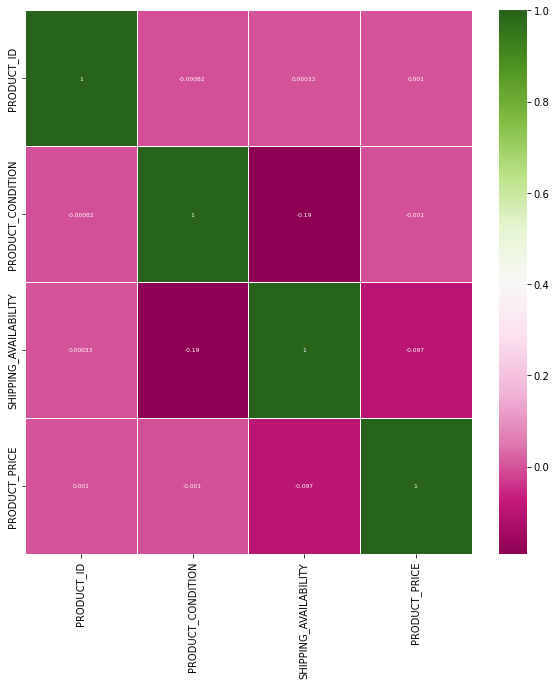

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(temp_df.corr(), cmap="PiYG", linewidths=0.5, annot = True, annot_kws={"fontsize":6})

Inference: No two columns are sufficiently correlated to drop.

Scatterplot

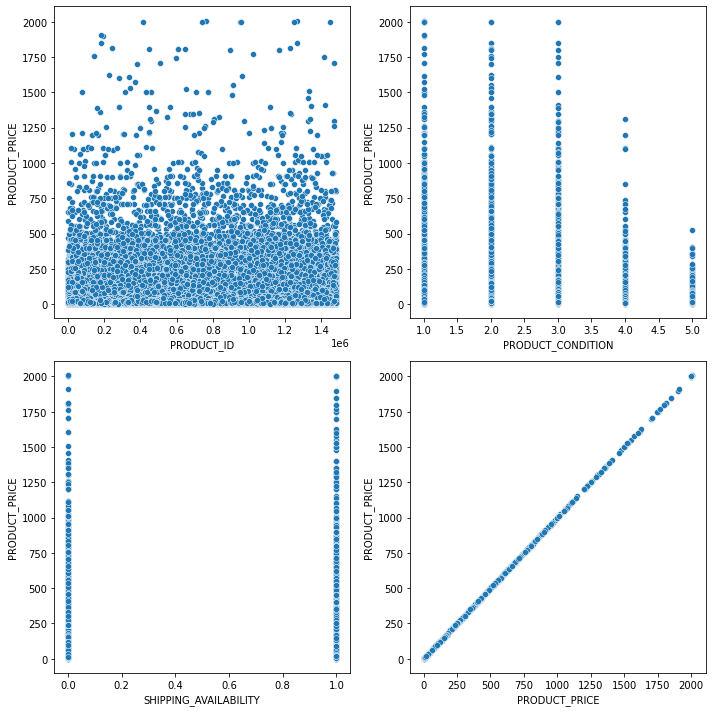

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
cc = 0
for col in temp_df.columns:
    if(type(temp_df[col][0])  != str):
        sns.scatterplot(data = temp_df, x = col, y = 'PRODUCT_PRICE', ax=ax[cc//2, cc%2], markers=',')
        cc+= 1
plt.tight_layout()

Boxplot

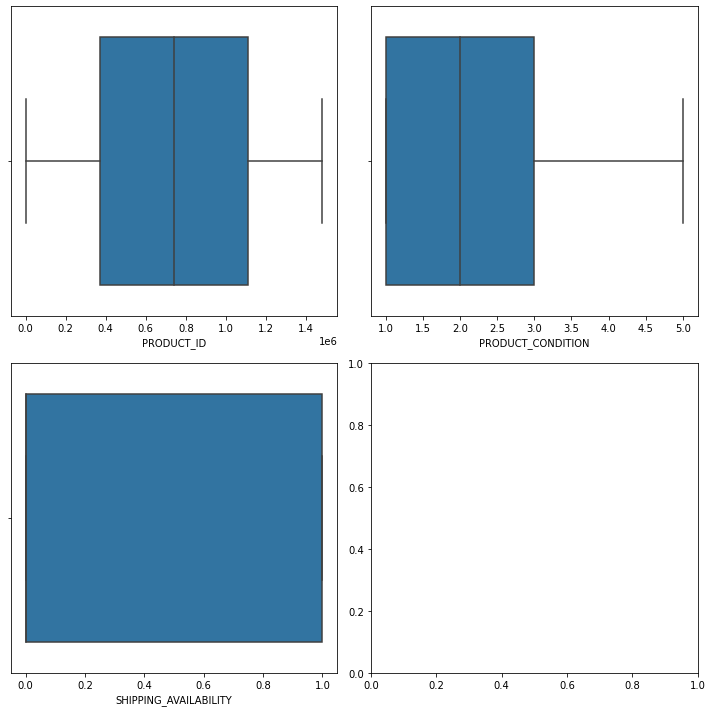

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
cc = 0
for col in temp_df.columns:
    if(type(temp_df[col][0]) != str and col != 'PRODUCT_PRICE'):
        sns.boxplot(data = temp_df, x = col, ax=ax[cc//2, cc%2])
        cc += 1
plt.tight_layout()

Histplot

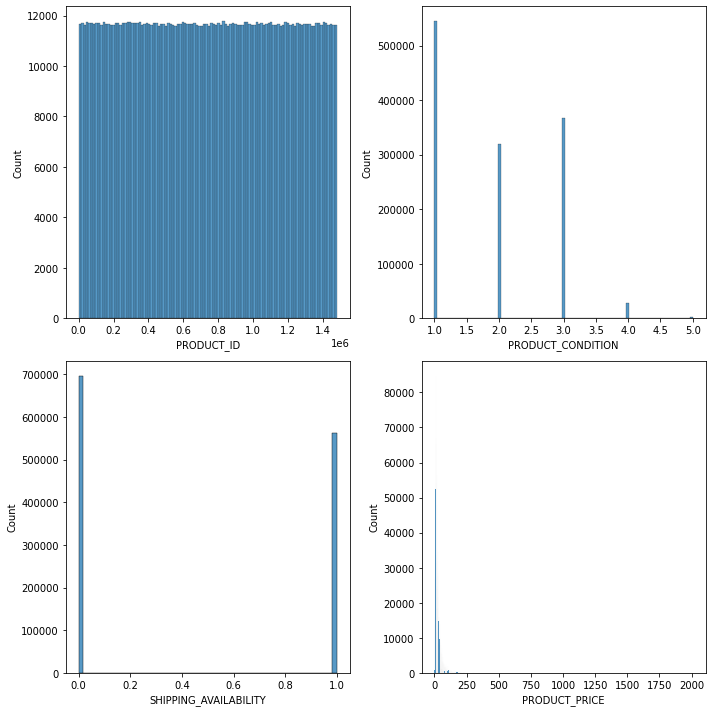

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
cc = 0
for col in temp_df.columns:
    if(type(temp_df[col][0]) != str):
        sns.histplot(data = temp_df, x = col, ax=ax[cc//2, cc%2])
        # sns.histplot(data = temp_df, x = col, ax=ax[cc//3, cc%3], kde = True, hue = 'species')
        cc += 1
plt.tight_layout()

# Models and Submission File Generation

In [29]:
# import math

# def trans(p):
#     # return (68/math.pi) * math.atan(p/17)
#     # return np.array([(68/math.pi) * math.atan(i/17) for i in p])
#     # return 40*(1 - np.exp(-(p/68000)))
#     return np.log(p+1)

# def itrans(x):
#     # return 17*math.tan(math.pi*x / 68)
#     # return np.array([17*math.tan(math.pi*i / 68) for i in x])
#     # return 68000*np.log(40/(40-x))
#     return np.exp(x)-1

Integration of features

In [30]:
train_data = scipy.sparse.hstack((
                        pd_train,
                        pb_train,
                        c1_train,
                        c2_train,
                        c3_train,
                        pn_train,
                        pro_cond_train,
                        np.array(temp_df['SHIPPING_AVAILABILITY']).reshape(-1,1),
                        )).tocsr()

In [31]:
test_data = scipy.sparse.hstack((
                        pd_test,
                        pb_test,
                        c1_test,
                        c2_test,
                        c3_test,
                        pn_test,
                        pro_cond_test,
                        np.array(test_df['SHIPPING_AVAILABILITY']).reshape(-1,1),
                        )).tocsr()

Train - Validation (Test) split

In [32]:
# temp_df.drop(temp_df[temp_df['PRODUCT_PRICE']<=0].index , axis=0, inplace=True)
y = temp_df['PRODUCT_PRICE'].to_numpy().astype(np.float64)
y = np.where(y < 10000, y, 10000)
k_mult = 1
y = k_mult*np.log1p(y)
train_x,test_x,train_y,test_y = train_test_split(train_data, y, train_size = 0.999,random_state=2)

### XGBoost

In [125]:
max_depth=20
n_estimators=200

In [ ]:
from xgboost import XGBRegressor

# xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bytree=1, gamma=1.5, learning_rate=0.1, max_delta_step=0,
#              max_depth=max_depth, min_child_weight=2, n_estimators=n_estimators,
#              n_jobs=-1, random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 
#              seed=None, silent=True, subsample=1,alpha=1)

xgb = XGBRegressor(n_estimators = 1000, max_depth = 5 ,  n_jobs=-1)

print("Fitting Model 1")
xgb.fit(train_data, y)

In [ ]:
pickle.dump(xgb, open(f'./xgbooster-{max_depth}-{n_estimators}.sav','wb'))

In [ ]:
xgb_yhat = xgb.predict(train_data)

In [ ]:
print("Train Data RMLSE = ", np.sqrt(mean_squared_error(y, xgb_yhat))/k_mult)

In [ ]:
final_y = np.expm1(xgb.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv(f'./xgbsubmission-reboot-{max_depth}-{n_estimators}.csv',index=False)

### LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(learning_rate= 0.8, num_leaves = 30, n_estimators = 800,
                           min_child_samples = 20, subsample = 0.6, colsample_bytree = 0.6,  
                           n_jobs=-1 , silent = False)

lgbm_model.fit(train_data, y)

In [ ]:
pickle.dump(lgbm_model, open(f'./lgbm.sav','wb'))

In [ ]:
lgbm_yhat = lgbm_model.predict(train_data)

In [ ]:
print("Train Data RMLSE = ", np.sqrt(mean_squared_error(y, lgbm_yhat))/k_mult)

In [ ]:
final_y = np.expm1(lgbm_model.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv(f'./lgbmsubmission-50-200.csv',index=False)

### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adb = AdaBoostRegressor(learning_rate=0.1, n_estimators=150, random_state=0)
adb.fit(train_data, y)

In [ ]:
adb_yhat = adb.predict(train_data)

In [ ]:
pickle.dump(adb, open('./adbooster.sav','wb'))

In [ ]:
print("Train Data RMLSE = ", np.sqrt(mean_squared_error(y, adb_yhat))/k_mult)

In [ ]:
final_y = np.expm1(adb.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./adbsubmission2111a.csv',index=False)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randomclassifier = RandomForestRegressor(n_estimators = 50, random_state = 0)
randomclassifier.fit(train_data, y)
# randomclassifier.fit(train_p_df, y)

In [ ]:
pickle.dump(randomclassifier, open('./randomforest.sav','wb'))

In [ ]:
random_yhat = randomclassifier.predict(train_data)
# predictions = randomclassifier.predict(test_p_df)

In [ ]:
print("Train Data RMLSE = ", np.sqrt(mean_squared_error(y, random_yhat))/k_mult)

In [ ]:
final_y = np.expm1(randomclassifier.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./randomforestsubmission.csv',index=False)

### Linear Regression

#### Splitted

In [37]:
lin1 = LinearRegression()
lin1.fit(train_x,train_y)

LinearRegression()

In [38]:
pickle.dump(lin1, open('./linearregression_split.sav','wb'))

In [39]:
lin1_train_yhat = lin1.predict(train_x)
lin1_test_yhat = lin1.predict(test_x)

In [40]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(train_y, lin1_train_yhat))/k_mult)
print("Test RMLSE = ", np.sqrt(mean_squared_error(test_y, lin1_test_yhat))/k_mult)

Train RMLSE =  0.43994423004091116
Test RMLSE =  0.4884110791770927


In [41]:
final_y = np.expm1(lin1.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./lin1submission.csv',index=False)

#### Full

In [ ]:
lin2 = LinearRegression()
lin2.fit(train_data,y)

In [ ]:
pickle.dump(lin2, open('./linearregression_full.sav','wb'))

In [ ]:
lin2_yhat = lin2.predict(train_data)

In [ ]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(y, lin2_yhat))/k_mult)

In [ ]:
final_y = np.expm1(lin2.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./lin2submission.csv',index=False)

### RidgeCV Regressor

#### Splitted

In [154]:
from sklearn.linear_model import RidgeCV

ridgecv1 = RidgeCV(fit_intercept=True, alphas=[5.0], cv = 2, scoring='neg_mean_squared_error')
# ridge1 = RidgeCV(fit_intercept=True,)
ridgecv1.fit(train_x, train_y)

RidgeCV(alphas=[5.0], cv=2, scoring='neg_mean_squared_error')

In [ ]:
pickle.dump(ridgecv1, open('./ridgecvregression_split.sav','wb'))

In [155]:
ridcv1_train_yhat = ridgecv1.predict(train_x)
ridcv1_test_yhat = ridgecv1.predict(test_x)

In [156]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(train_y, ridcv1_train_yhat))/k_mult)
print("Test RMLSE = ", np.sqrt(mean_squared_error(test_y, ridcv1_test_yhat))/k_mult)

Train RMLSE =  0.44687441776860287
Test RMLSE =  0.47503949241981414


In [157]:
final_y = np.expm1(ridgecv1.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./ridgecv1submission.csv',index=False)

#### Full

In [56]:
ridgecv2 = RidgeCV(fit_intercept=True, alphas=[5.0], cv = 2, scoring='neg_mean_squared_error')
ridgecv2.fit(train_data, y)

In [ ]:
pickle.dump(ridgecv2, open('./ridgecvregression_full.sav','wb'))

In [ ]:
ridcv2_yhat = ridgecv2.predict(train_data)

In [ ]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(y, ridcv2_yhat))/k_mult)

In [ ]:
final_y = np.expm1(ridgecv2.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./ridgecv2submission.csv',index=False)

### Ridge Regression

#### Split

In [41]:
from sklearn.linear_model import Ridge

# ridge1 = Ridge(alpha=5, fit_intercept=True,copy_X=True,solver='auto',random_state=0,tol=0.01,)
ridge1 = Ridge(alpha=5, fit_intercept=True,copy_X=True)
ridge1.fit(train_x,train_y)

Ridge(alpha=5)

In [42]:
pickle.dump(ridge1, open('./ridgesplit.sav','wb'))

In [43]:
rid1_train_yhat=ridge1.predict(train_x)
rid1_test_yhat=ridge1.predict(test_x)

In [44]:
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(train_y, rid1_train_yhat))/k_mult)
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(test_y, rid1_test_yhat))/k_mult)

Train Data RMLSE =  0.4471827100186593
Train Data RMLSE =  0.4762059645540373


In [45]:
# rid1_train_yhat = itrans(rid1_train_yhat)
# rid1_test_yhat = itrans(rid1_test_yhat)

In [46]:
final_y = np.expm1(ridge1.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./ridge1submission.csv',index=False)

#### Full

In [47]:
ridge2 = Ridge(alpha=5, fit_intercept=True,copy_X=True)
ridge2.fit(train_data,y)

Ridge(alpha=5)

In [48]:
pickle.dump(ridge2, open('./ridgefull.sav','wb'))

In [57]:
rid2_yhat=ridge2.predict(train_data)

In [58]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(y, rid2_yhat))/k_mult)

Train RMLSE =  0.44717177666785923


In [51]:
final_y = np.expm1(ridge2.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./ridge2submission.csv',index=False)

### SGD Regressor

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

In [3]:
param_grid = {'alpha':[0.01,0.1,1,5], 'fit_intercept': [True,False], 'epsilon' :[1,0.1],
             'eta0':[1,0.1]}

model = SGDRegressor(loss='squared_epsilon_insensitive', learning_rate = 'adaptive', early_stopping= True )

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, verbose = 1)
grid_search.fit(train_x,train_y)

#### Split

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(loss='squared_epsilon_insensitive',learning_rate = 'adaptive', early_stopping= True,)
sgd_model.fit(train_x, train_y)

SGDRegressor(early_stopping=True, learning_rate='adaptive',
             loss='squared_epsilon_insensitive')

In [ ]:
pickle.dump(sgd_model, open('./sgdsplit.sav','wb'))

In [ ]:
sgd_train_yhat = sgd_model.predict(train_x)
sgd_test_yhat = sgd_model.predict(test_x)

In [ ]:
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(train_y, sgd_train_yhat))/k_mult)
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(test_y, sgd_test_yhat))/k_mult)

Train Data RMLSE =  0.47294614568100657
Train Data RMLSE =  0.48351854828307755


In [ ]:
final_y = np.expm1(sgd_model.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./sgdsubmission.csv',index=False)

#### Full

In [59]:
sgd2 = SGDRegressor(loss='squared_epsilon_insensitive',learning_rate = 'adaptive', early_stopping= True,)
sgd2.fit(train_data,y)

SGDRegressor(early_stopping=True, learning_rate='adaptive',
             loss='squared_epsilon_insensitive')

In [60]:
pickle.dump(sgd2, open('./sgd2.sav','wb'))

In [61]:
sgd2_yhat=sgd2.predict(train_data)

In [62]:
print("Train RMLSE = ", np.sqrt(mean_squared_error(y, sgd2_yhat))/k_mult)

Train RMLSE =  0.4729771861510515


In [63]:
final_y = np.expm1(sgd2.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./sgd2submission.csv',index=False)

### Lasso Regressor

#### Split

In [42]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=5, fit_intercept=True, copy_X=True)
lasso_model.fit(train_x, train_y)

Lasso(alpha=5)

In [43]:
pickle.dump(lasso_model, open('./lassosplit.sav','wb'))

In [44]:
lasso_train_yhat = lasso_model.predict(train_x)
lasso_test_yhat = lasso_model.predict(test_x)

In [45]:
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(train_y, lasso_train_yhat))/k_mult)
print("Train Data RMLSE = ",np.sqrt(mean_squared_error(test_y, lasso_test_yhat))/k_mult)

Train Data RMLSE =  0.749023940919784
Train Data RMLSE =  0.7470886366587685


In [46]:
final_y = np.expm1(lasso_model.predict(test_data)/k_mult)
output = pd.DataFrame(data = np.hstack((test_df['PRODUCT_ID'].to_numpy().reshape(-1,1),final_y.reshape(-1,1))), columns = ['PRODUCT_ID','PRODUCT_PRICE'])
output['PRODUCT_ID'] = output['PRODUCT_ID'].astype(np.int32)
output.to_csv('./lassosubmission.csv',index=False)